Import packages
=

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

Read File
=

In [2]:
df = pd.read_csv("hatla2ee_scraped_data.csv")

In [3]:
df

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Kia Sportage 2024,"2,800,000 EGP",Dark grey,300 Km,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...
1,Chery Arrizo 5 2022,NaN,Bronze,"86,000 Km",Chery,Arrizo 5,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chery/Arrizo-5/...
2,Fiat Tipo 2021,"1,200,000 EGP",Petroleum,"131,000 Km",Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701
3,Hyundai Tucson Turbo GDI 2021,"2,050,000 EGP",Black,"125,000 Km",Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...
4,BMW X1 2018,"2,050,000 EGP",Gray,"84,000 Km",BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/bmw/x1/6254123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33554,Jac J3 2021,"900,000 EGP",White,"240,000 Km",Jac,J3,6 October,2024-02-16,Yes,No,No,No,https://eg.hatla2ee.com/en/car/jac/j3/6286737
33555,Skoda Kodiaq 2023,"3,000,000 EGP",Dark grey,NaN,Skoda,Kodiaq,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/skoda/kodiaq/62...
33556,MG 5 2022,"1,170,000 EGP",Black,"48,000 Km",MG,5,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/moris-garage/mg...
33557,Hyundai Verna 2010,"285,000 EGP",White,"175,000 Km",Hyundai,Verna,Alexandria,2024-02-16,No,No,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/verna/6...


Ensuring data usage
=

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33559 entries, 0 to 33558
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    33559 non-null  object
 1   Price                   32625 non-null  object
 2   Color                   33559 non-null  object
 3   Mileage                 31440 non-null  object
 4   Make                    33559 non-null  object
 5   Model                   33559 non-null  object
 6   City                    33559 non-null  object
 7   Date Displayed          33559 non-null  object
 8   Automatic Transmission  33559 non-null  object
 9   Air Conditioner         33559 non-null  object
 10  Power Steering          33559 non-null  object
 11  Remote Control          33559 non-null  object
 12  Item URL                33559 non-null  object
dtypes: object(13)
memory usage: 3.3+ MB


In [5]:
df['Price'] = df['Price'].str.replace('EGP','').str.strip()
df['Price'] = df['Price'].str.replace(',','').str.strip()
df['Mileage'] = df['Mileage'].str.replace('Km','').str.strip()
df['Mileage'] = df['Mileage'].str.replace(',','').str.strip()
df[['car_name', 'car_year']] = df['Name'].str.extract(r'(.+)\s(\d{4})')



define constraints
=

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33559 entries, 0 to 33558
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    33559 non-null  object
 1   Price                   32625 non-null  object
 2   Color                   33559 non-null  object
 3   Mileage                 31440 non-null  object
 4   Make                    33559 non-null  object
 5   Model                   33559 non-null  object
 6   City                    33559 non-null  object
 7   Date Displayed          33559 non-null  object
 8   Automatic Transmission  33559 non-null  object
 9   Air Conditioner         33559 non-null  object
 10  Power Steering          33559 non-null  object
 11  Remote Control          33559 non-null  object
 12  Item URL                33559 non-null  object
 13  car_name                33558 non-null  object
 14  car_year                33558 non-null  object
dtypes:

In [7]:
df

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL,car_name,car_year
0,Kia Sportage 2024,2800000,Dark grey,300,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...,Kia Sportage,2024
1,Chery Arrizo 5 2022,NaN,Bronze,86000,Chery,Arrizo 5,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chery/Arrizo-5/...,Chery Arrizo 5,2022
2,Fiat Tipo 2021,1200000,Petroleum,131000,Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701,Fiat Tipo,2021
3,Hyundai Tucson Turbo GDI 2021,2050000,Black,125000,Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...,Hyundai Tucson Turbo GDI,2021
4,BMW X1 2018,2050000,Gray,84000,BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/bmw/x1/6254123,BMW X1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33554,Jac J3 2021,900000,White,240000,Jac,J3,6 October,2024-02-16,Yes,No,No,No,https://eg.hatla2ee.com/en/car/jac/j3/6286737,Jac J3,2021
33555,Skoda Kodiaq 2023,3000000,Dark grey,NaN,Skoda,Kodiaq,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/skoda/kodiaq/62...,Skoda Kodiaq,2023
33556,MG 5 2022,1170000,Black,48000,MG,5,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/moris-garage/mg...,MG 5,2022
33557,Hyundai Verna 2010,285000,White,175000,Hyundai,Verna,Alexandria,2024-02-16,No,No,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/verna/6...,Hyundai Verna,2010


In [8]:
df['Price'] = df['Price'].astype('float')
df['Color'] = df['Color'].astype('category')
df['Mileage'] = df['Mileage'].astype('float')
df['Make'] = df['Make'].astype('string')
df['Model'] = df['Model'].astype('string')
df['City'] = df['City'].astype('string')
df['Date Displayed'] = df['Date Displayed'].astype('datetime64[ns]')
bool_map = {'Yes':True , 'No':False}
df['Automatic Transmission']= df['Automatic Transmission'].map(bool_map)
df['Automatic Transmission']= df['Automatic Transmission'].astype('bool')
df['Air Conditioner'] = df['Air Conditioner'].map(bool_map)
df['Air Conditioner'] = df['Air Conditioner'].astype('bool')
df['Power Steering'] = df['Power Steering'].map(bool_map)
df['Power Steering'] = df['Power Steering'].astype('bool')
df['Remote Control'] = df['Remote Control'].map(bool_map)
df['Remote Control'] = df['Remote Control'].astype('bool')
df['Item URL'] = df['Item URL'].astype('string')
df['car_name'] = df['car_name'].astype('string')
df['car_year'] = df['car_year'].astype('float')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33559 entries, 0 to 33558
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Name                    33559 non-null  object        
 1   Price                   32625 non-null  float64       
 2   Color                   33559 non-null  category      
 3   Mileage                 31440 non-null  float64       
 4   Make                    33559 non-null  string        
 5   Model                   33559 non-null  string        
 6   City                    33559 non-null  string        
 7   Date Displayed          33559 non-null  datetime64[ns]
 8   Automatic Transmission  33559 non-null  bool          
 9   Air Conditioner         33559 non-null  bool          
 10  Power Steering          33559 non-null  bool          
 11  Remote Control          33559 non-null  bool          
 12  Item URL                33559 non-null  string

In [10]:
df['car_year'].describe()

count    33558.000000
mean      2014.324662
std          8.323756
min       1963.000000
25%       2010.000000
50%       2016.000000
75%       2021.000000
max       2024.000000
Name: car_year, dtype: float64

Check wrong values and outliers
=

In [11]:
df['Price'].min()

np.float64(1060.0)

In [12]:
df[df['Price']<50000].count()

Name                      206
Price                     206
Color                     206
Mileage                    69
Make                      206
Model                     206
City                      206
Date Displayed            206
Automatic Transmission    206
Air Conditioner           206
Power Steering            206
Remote Control            206
Item URL                  206
car_name                  206
car_year                  206
dtype: int64

In [13]:
df[df['Price']<100000].count()

Name                      928
Price                     928
Color                     928
Mileage                   583
Make                      928
Model                     928
City                      928
Date Displayed            928
Automatic Transmission    928
Air Conditioner           928
Power Steering            928
Remote Control            928
Item URL                  928
car_name                  927
car_year                  927
dtype: int64

In [14]:
df[df['Price']<50000]

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL,car_name,car_year
235,Fiat 128 1979,35000.0,Red,NaN,Fiat,128,Giza,2024-02-15,False,False,False,False,https://eg.hatla2ee.com/en/car/fiat/128/6274052,Fiat 128,1979.0
277,Nissan Sunny 2024,1060.0,Black,NaN,Nissan,Sunny,Alexandria,2024-02-15,True,True,True,True,https://eg.hatla2ee.com/en/car/nissan/sunny/62...,Nissan Sunny,2024.0
394,Toyota Camry 2019,30000.0,Black,93000.0,Toyota,Camry,Suez,2024-02-15,True,True,True,True,https://eg.hatla2ee.com/en/car/toyota/camry/62...,Toyota Camry,2019.0
817,Fiat 127 1985,40000.0,Red,80000.0,Fiat,127,El Marg,2024-02-14,False,False,False,False,https://eg.hatla2ee.com/en/car/fiat/127/6283749,Fiat 127,1985.0
1133,Mazda 323 1982,30000.0,Silver,NaN,Mazda,323,10th of Ramadan,2024-02-13,False,False,False,False,https://eg.hatla2ee.com/en/car/mazda/323/6282135,Mazda 323,1982.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21827,Lada 124 1995,30000.0,White,NaN,Lada,124,El Marg,2023-10-22,False,False,False,False,https://eg.hatla2ee.com/en/car/lada/fiat-124/6...,Lada 124,1995.0
21885,Fiat 128 1987,42000.0,White,NaN,Fiat,128,Cairo,2023-10-19,False,False,False,False,https://eg.hatla2ee.com/en/car/fiat/128/6048622,Fiat 128,1987.0
21950,Fiat 131 1977,43000.0,Yellow,140000.0,Fiat,131,6 October,2023-10-18,False,False,False,False,https://eg.hatla2ee.com/en/car/fiat/131/6045187,Fiat 131,1977.0
21994,Fiat 127 1985,45000.0,Beige,NaN,Fiat,127,Cairo,2023-10-17,False,False,False,False,https://eg.hatla2ee.com/en/car/fiat/127/6043183,Fiat 127,1985.0


In [15]:
df = df[df['Price']>50000]

In [16]:
df

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL,car_name,car_year
0,Kia Sportage 2024,2800000.0,Dark grey,300.0,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/kia/sportage/62...,Kia Sportage,2024.0
2,Fiat Tipo 2021,1200000.0,Petroleum,131000.0,Fiat,Tipo,Kafr el-Dawwar,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701,Fiat Tipo,2021.0
3,Hyundai Tucson Turbo GDI 2021,2050000.0,Black,125000.0,Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...,Hyundai Tucson Turbo GDI,2021.0
4,BMW X1 2018,2050000.0,Gray,84000.0,BMW,X1,Cairo,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/bmw/x1/6254123,BMW X1,2018.0
5,Chevrolet Optra 2021,700000.0,Blue,75000.0,Chevrolet,Optra,Obour City,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/chevrolet/optra...,Chevrolet Optra,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33553,Toyota Corolla 2008,650000.0,Black,199000.0,Toyota,Corolla,Alexandria,2024-02-16,False,False,False,False,https://eg.hatla2ee.com/en/car/toyota/corolla/...,Toyota Corolla,2008.0
33554,Jac J3 2021,900000.0,White,240000.0,Jac,J3,6 October,2024-02-16,True,False,False,False,https://eg.hatla2ee.com/en/car/jac/j3/6286737,Jac J3,2021.0
33555,Skoda Kodiaq 2023,3000000.0,Dark grey,NaN,Skoda,Kodiaq,Tagamo3 - New Cairo,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/skoda/kodiaq/62...,Skoda Kodiaq,2023.0
33556,MG 5 2022,1170000.0,Black,48000.0,MG,5,Kafr el-Dawwar,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/moris-garage/mg...,MG 5,2022.0


In [17]:
today = dt.date.today()

In [18]:
today

datetime.date(2024, 11, 30)

In [19]:
df['Date Displayed'] = pd.to_datetime(df['Date Displayed']).dt.date

/tmp/ipykernel_12172/3068451825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date Displayed'] = pd.to_datetime(df['Date Displayed']).dt.date


In [20]:
df[df['Date Displayed']>today].count()

Name                      0
Price                     0
Color                     0
Mileage                   0
Make                      0
Model                     0
City                      0
Date Displayed            0
Automatic Transmission    0
Air Conditioner           0
Power Steering            0
Remote Control            0
Item URL                  0
car_name                  0
car_year                  0
dtype: int64

Handling duplicates
=

In [21]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL,car_name,car_year
0,Kia Sportage 2024,2800000.0,Dark grey,300.0,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/kia/sportage/62...,Kia Sportage,2024.0
2,Fiat Tipo 2021,1200000.0,Petroleum,131000.0,Fiat,Tipo,Kafr el-Dawwar,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701,Fiat Tipo,2021.0
3,Hyundai Tucson Turbo GDI 2021,2050000.0,Black,125000.0,Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...,Hyundai Tucson Turbo GDI,2021.0
4,BMW X1 2018,2050000.0,Gray,84000.0,BMW,X1,Cairo,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/bmw/x1/6254123,BMW X1,2018.0
5,Chevrolet Optra 2021,700000.0,Blue,75000.0,Chevrolet,Optra,Obour City,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/chevrolet/optra...,Chevrolet Optra,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33553,Toyota Corolla 2008,650000.0,Black,199000.0,Toyota,Corolla,Alexandria,2024-02-16,False,False,False,False,https://eg.hatla2ee.com/en/car/toyota/corolla/...,Toyota Corolla,2008.0
33554,Jac J3 2021,900000.0,White,240000.0,Jac,J3,6 October,2024-02-16,True,False,False,False,https://eg.hatla2ee.com/en/car/jac/j3/6286737,Jac J3,2021.0
33555,Skoda Kodiaq 2023,3000000.0,Dark grey,NaN,Skoda,Kodiaq,Tagamo3 - New Cairo,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/skoda/kodiaq/62...,Skoda Kodiaq,2023.0
33556,MG 5 2022,1170000.0,Black,48000.0,MG,5,Kafr el-Dawwar,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/moris-garage/mg...,MG 5,2022.0


In [22]:
duplicate_rows.count()

Name                      10701
Price                     10701
Color                     10701
Mileage                   10362
Make                      10701
Model                     10701
City                      10701
Date Displayed            10701
Automatic Transmission    10701
Air Conditioner           10701
Power Steering            10701
Remote Control            10701
Item URL                  10701
car_name                  10701
car_year                  10701
dtype: int64

In [23]:
df = df.drop_duplicates()

In [24]:
df

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL,car_name,car_year
0,Kia Sportage 2024,2800000.0,Dark grey,300.0,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/kia/sportage/62...,Kia Sportage,2024.0
2,Fiat Tipo 2021,1200000.0,Petroleum,131000.0,Fiat,Tipo,Kafr el-Dawwar,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701,Fiat Tipo,2021.0
3,Hyundai Tucson Turbo GDI 2021,2050000.0,Black,125000.0,Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...,Hyundai Tucson Turbo GDI,2021.0
4,BMW X1 2018,2050000.0,Gray,84000.0,BMW,X1,Cairo,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/bmw/x1/6254123,BMW X1,2018.0
5,Chevrolet Optra 2021,700000.0,Blue,75000.0,Chevrolet,Optra,Obour City,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/chevrolet/optra...,Chevrolet Optra,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31734,Chery Arrizo 5 2020,560000.0,White,NaN,Chery,Arrizo 5,El Haram,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/chery/Arrizo-5/...,Chery Arrizo 5,2020.0
31735,Nissan Sunny 2024,860000.0,Red,7000.0,Nissan,Sunny,Heliopolis,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/nissan/sunny/62...,Nissan Sunny,2024.0
31736,Brilliance V5 2013,1000000.0,Blue,250000.0,Brilliance,V5,Tagamo3 - New Cairo,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/brilliance/v5/6...,Brilliance V5,2013.0
31737,BMW 320 2023,3650000.0,Black,11000.0,BMW,320,Cairo,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/bmw/320/6280982,BMW 320,2023.0


In [25]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL,car_name,car_year


checking consistency
=

In [26]:
df['Color'].unique()

['Dark grey', 'Petroleum', 'Black', 'Gray', 'Blue', ..., 'Dark green', 'Olive', 'Purple', 'Orange', 'Beige']
Length: 24
Categories (24, object): ['Beige', 'Black', 'Blue', 'Bronze', ..., 'Red', 'Silver', 'White', 'Yellow']

In [27]:
df['Make'].unique()

<StringArray>
[       'Kia',       'Fiat',    'Hyundai',        'BMW',  'Chevrolet',
      'Chery',       'Ford',     'Nissan', 'Mitsubishi',       'Opel',
 ...
      'Hafei',      'Sokon',      'Lotus',     'Keyton',      'Buick',
   'Cadillac',       'Domy',    'Bugatti',   'Landwind',    'Perodua']
Length: 101, dtype: string

Handling nulls
=

In [28]:
df.isna().sum()

Name                         0
Price                        0
Color                        0
Mileage                   1038
Make                         0
Model                        0
City                         0
Date Displayed               0
Automatic Transmission       0
Air Conditioner              0
Power Steering               0
Remote Control               0
Item URL                     0
car_name                     1
car_year                     1
dtype: int64

In [29]:
df['Mileage']

0           300.0
2        131000.0
3        125000.0
4         84000.0
5         75000.0
           ...   
31734         NaN
31735      7000.0
31736    250000.0
31737     11000.0
31738    135000.0
Name: Mileage, Length: 21743, dtype: float64

In [30]:
df['Mileage'].describe()

count    2.070500e+04
mean     1.350394e+05
std      8.778267e+04
min      0.000000e+00
25%      7.000000e+04
50%      1.270000e+05
75%      1.900000e+05
max      2.226000e+06
Name: Mileage, dtype: float64

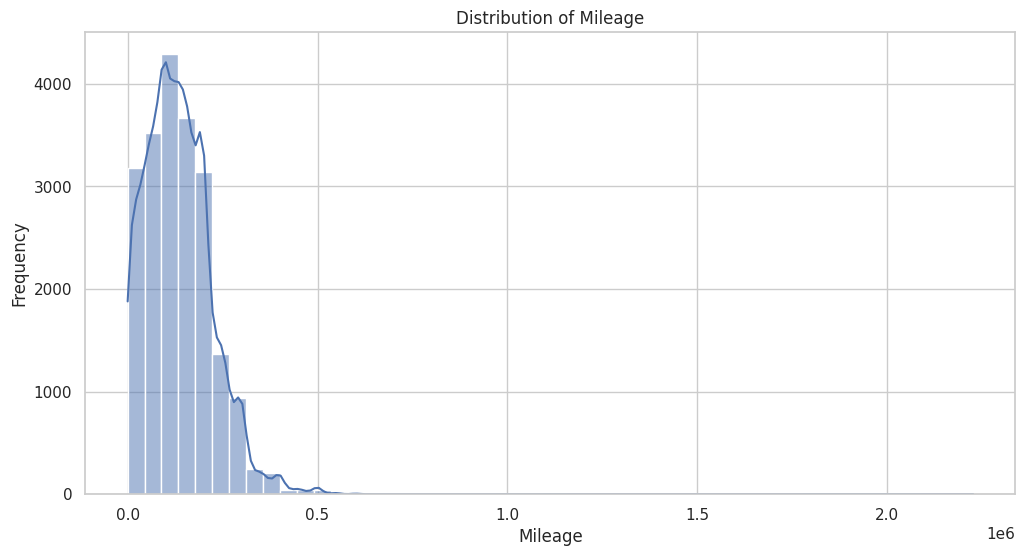

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Mileage'], bins=50, kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

In [32]:
df['Mileage'].fillna(df['Mileage'].median(), inplace=True)


/tmp/ipykernel_12172/3703417684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'].fillna(df['Mileage'].median(), inplace=True)


In [33]:
df.isna().sum()

Name                      0
Price                     0
Color                     0
Mileage                   0
Make                      0
Model                     0
City                      0
Date Displayed            0
Automatic Transmission    0
Air Conditioner           0
Power Steering            0
Remote Control            0
Item URL                  0
car_name                  1
car_year                  1
dtype: int64

In [34]:
df.dropna(subset=['car_name','car_year'], inplace=True)

/tmp/ipykernel_12172/3678735382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['car_name','car_year'], inplace=True)


In [35]:
df.isna().sum()

Name                      0
Price                     0
Color                     0
Mileage                   0
Make                      0
Model                     0
City                      0
Date Displayed            0
Automatic Transmission    0
Air Conditioner           0
Power Steering            0
Remote Control            0
Item URL                  0
car_name                  0
car_year                  0
dtype: int64

synchonization
=

In [36]:
df['carname_check'] = df['Make'] + ' ' + df['Model']
df['is_synchronized'] = df['car_name'] == df['carname_check']
incorrect_sync = df[~df['is_synchronized']]
incorrect_sync

/tmp/ipykernel_12172/3389509688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['carname_check'] = df['Make'] + ' ' + df['Model']
/tmp/ipykernel_12172/3389509688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_synchronized'] = df['car_name'] == df['carname_check']


,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL,car_name,car_year,carname_check,is_synchronized


Export csv file
=

In [37]:
df.to_csv('cars.csv', index=False)
